/tmp/ipykernel_50472/4159060939.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = int(row[0])


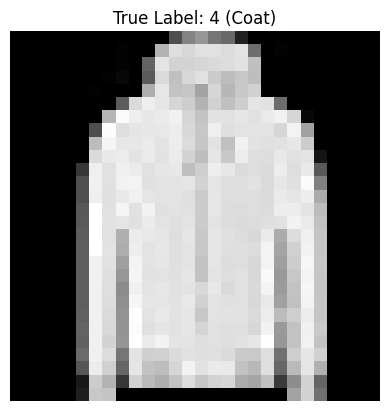

Predicted Label: 4 (Coat)


In [5]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

device = torch.device("cpu")

model = torch.load('./output/mnist_fashion.pth', map_location=device, weights_only = False)
model.to(device)
model.eval()

test_df = pd.read_csv('./input/fashion-mnist_test.csv')

index = random.randint(0, len(test_df) - 1)
row = test_df.iloc[index]
label = int(row[0]) 
image = row[1:].values.astype(np.uint8).reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f"True Label: {label}, True Class{classes[label]}")
plt.axis('off')
plt.show()

image = image.astype(np.float32) / 255.0  
image_tensor = torch.tensor(image).unsqueeze(0).unsqueeze(0) 
image_tensor = image_tensor.to(device)

with torch.no_grad():
    output = model(image_tensor)
    _, predicted = torch.max(output, 1)

print(f"Predicted Label: {predicted.item()}, Predicted Class{classes[predicted.item()]})")
